In [1]:
%pylab inline
from PIL import Image
import os 
import numpy as np
#install pandas
import pandas as pd
#it should be "from scipy.misc import imread"
from matplotlib.pyplot import imread
from sklearn.metrics import accuracy_score
import sys
import tensorflow as tf
import sonnet as snt

from sklearn.preprocessing import LabelBinarizer
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import image
from keras.utils import to_categorical

Populating the interactive namespace from numpy and matplotlib


W0823 16:15:09.227148   912 deprecation_wrapper.py:119] From c:\users\aaa\appdata\local\programs\python\python37\lib\site-packages\sonnet\python\custom_getters\restore_initializer.py:27: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0823 16:15:09.679549   912 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Using TensorFlow backend.


In [2]:
#if you need seed
seed = 0
rng = np.random.RandomState(seed)


In [3]:
root_dir = os.path.abspath('.')
data_dir = os.path.join(root_dir,'data')
image_dir = os.path.join(root_dir,'images')
test_dir = os.path.join(root_dir,'imagestest')

os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(image_dir)

True

In [4]:
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))
train.head()
test.head()

,ID
0,5
1,7
2,8
3,9
4,13


(180, 180, 3)


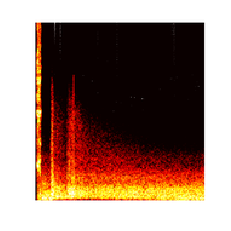

In [5]:
img_name = rng.choice(train.ID)
filepath = os.path.join(image_dir, (str(img_name) + '.png'))
img = imread(filepath)

#in testing part, don't touch it.
im = Image.open(filepath)
rgb_im = im.convert('RGB')
print(img.shape)
pylab.imshow(img)
pylab.axis('off')
pylab.show()


In [6]:
temp = []
for imagename in train.ID:
    if imagename != 4 and imagename != 3190 and imagename != 8542:
        image_path = os.path.join(image_dir,(str(imagename) + '.png'))
        img = imread(image_path)
        img = img.astype('float32')
        img = imread(image_path)
        temp.append(img)

train_x = np.stack(temp)

temp = []
"""for imagename in test.ID:
    if imagename != 4 and imagename != 3190 and imagename != 8542:
        temp.append(imread(os.path.join(image_dir, (str(imagename) + '.png'))))
test_x = np.stack(temp)"""

    

"for imagename in test.ID:\n    if imagename != 4 and imagename != 3190 and imagename != 8542:\n        temp.append(imread(os.path.join(image_dir, (str(imagename) + '.png'))))\ntest_x = np.stack(temp)"

In [7]:
#split_size = int(train_x.shape[0] * 0.7)
split_size = int(train_x.shape[0] * 1)
train_x, val_x = train_x[:split_size], train_x[split_size:]
encoder = LabelBinarizer()
temp = encoder.fit_transform(train.Class.values)
#train_y, val_y = encoder.fit_transform(train.Class.values[:split_size]), encoder.fit_transform(train.Class.values[split_size:])
train_y, val_y = temp[:split_size], temp[split_size:]
print(val_y)
print(train_x.shape[0])
print(train_x.shape[0])
print(val_x.shape[0])
print(train_y.shape[0])
print(val_y.shape[0])
print(train.Class.size)

[]
5432
5432
0
5432
0
5432


In [8]:
jobs = 1 # it means number of cores
config = tf.ConfigProto(intra_op_parallelism_threads=jobs,
                         inter_op_parallelism_threads=jobs,
                         allow_soft_placement=True,
                         device_count={'CPU': jobs})
session = tf.Session(config=config)
K.set_session(session)

In [9]:
#batch_size = 500
batch_size = 200
epochs = 10
num_classes = 10

img_rows, img_cols = 180, 180

if K.image_data_format() == 'channels_first':
    train_x = train_x.reshape(train_x.shape[0], 3, img_rows, img_cols)
    val_x = val_x.reshape(val_x.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_x = train_x.reshape(train_x.shape[0], img_rows, img_cols, 3)
    val_x = val_x.reshape(val_x.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation = 'relu',
                input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.RMSprop()
             ,metrics=['accuracy'])
model.fit(train_x, train_y,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1)
         #,validation_data = (val_x, val_y))
"""score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss :', score[0])
print('Test accuracy : ', score[1])"""


W0823 16:15:20.989569   912 deprecation_wrapper.py:119] From c:\users\aaa\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 16:15:20.989569   912 deprecation_wrapper.py:119] From c:\users\aaa\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 16:15:21.005169   912 deprecation_wrapper.py:119] From c:\users\aaa\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 16:15:21.020769   912 deprecation_wrapper.py:119] From c:\users\aaa\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please us

Epoch 1/10
5432/5432 [==============================] - 241s 44ms/step - loss: 3.1809 - acc: 0.2535
Epoch 2/10
5432/5432 [==============================] - 241s 44ms/step - loss: 1.5145 - acc: 0.4796
Epoch 3/10
5432/5432 [==============================] - 243s 45ms/step - loss: 1.1844 - acc: 0.5863
Epoch 4/10
5432/5432 [==============================] - 243s 45ms/step - loss: 0.9173 - acc: 0.6887
Epoch 5/10
5432/5432 [==============================] - 242s 45ms/step - loss: 0.7587 - acc: 0.7502
Epoch 6/10
5432/5432 [==============================] - 243s 45ms/step - loss: 0.6552 - acc: 0.7859
Epoch 7/10
5432/5432 [==============================] - 244s 45ms/step - loss: 0.5335 - acc: 0.8293
Epoch 8/10
5432/5432 [==============================] - 244s 45ms/step - loss: 0.4373 - acc: 0.8571
Epoch 9/10
5432/5432 [==============================] - 244s 45ms/step - loss: 0.3626 - acc: 0.8824
Epoch 10/10
5432/5432 [==============================] - 250s 46ms/step - loss: 0.3022 - acc: 0.9024

"score = model.evaluate(x_test, y_test, verbose = 0)\nprint('Test loss :', score[0])\nprint('Test accuracy : ', score[1])"

In [ ]:

with open('submission.csv', 'a') as submission:
    for image_name in test.ID:
        if image_name != 55 and image_name != 1201 and image_name != 2893\
            and image_name != 4020 and image_name != 5469 and image_name !=5501\
            and image_name != 5993 and image_name != 5998 and image_name != 8730\
            and image_name != 8731:
            something = imread(os.path.join(test_dir, (str(image_name) + '.png')))
            something = something.reshape(1, img_rows, img_cols, 3)
            x = model.predict(something)
            x = encoder.inverse_transform(x)
            submission.write('\n' + x[0] + ',' + str(image_name) )
        else:
            something = imread('imagestest/5.png')
            something = something.reshape(1, img_rows, img_cols, 3)
            x = model.predict(something)
            x = encoder.inverse_transform(x)
            submission.write('\n' + x[0] + ',' + str(image_name) )
                



"""for something in test_x:
    #something = imread('imagestest/5.png')
    something = something.reshape(1, img_rows, img_cols, 3)
    x = model.predict(something)
    print(encoder.inverse_transform(x))"""